In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df1 = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
df2 = pd.read_csv("Sheriff_and_Police_Stations.csv")

df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

df1['YearMonth'] = df1['DATE OCC'].dt.to_period('M').astype(str)

# Crear el gráfico de dispersión con un control deslizante para cambiar las fechas
fig = px.scatter_mapbox(df1, lat="LAT", lon="LON", color="Crm Cd Desc", hover_name="Crm Cd Desc",
                        hover_data=["DATE OCC", "AREA NAME", "Vict Sex", "Vict Age"],
                        animation_frame="YearMonth", zoom=10, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

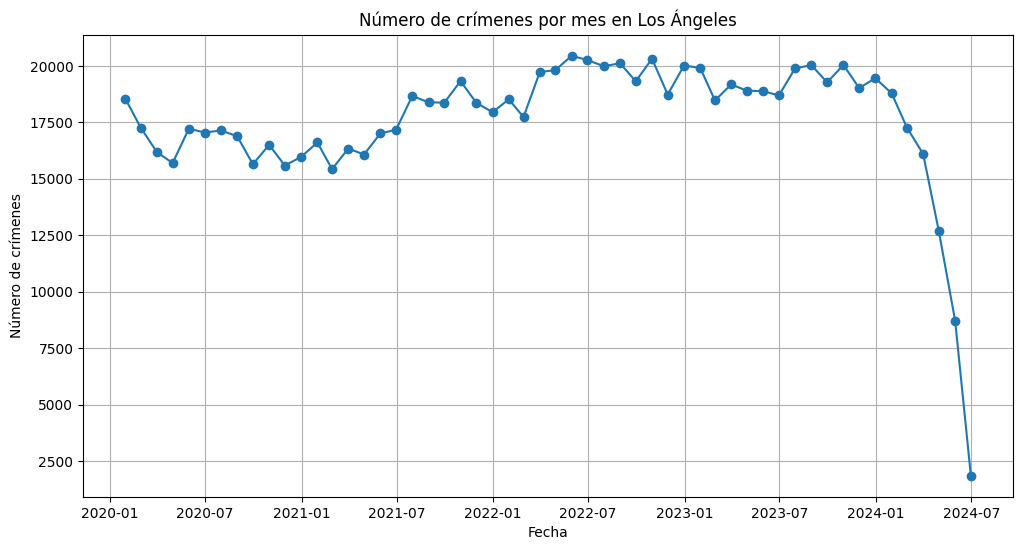

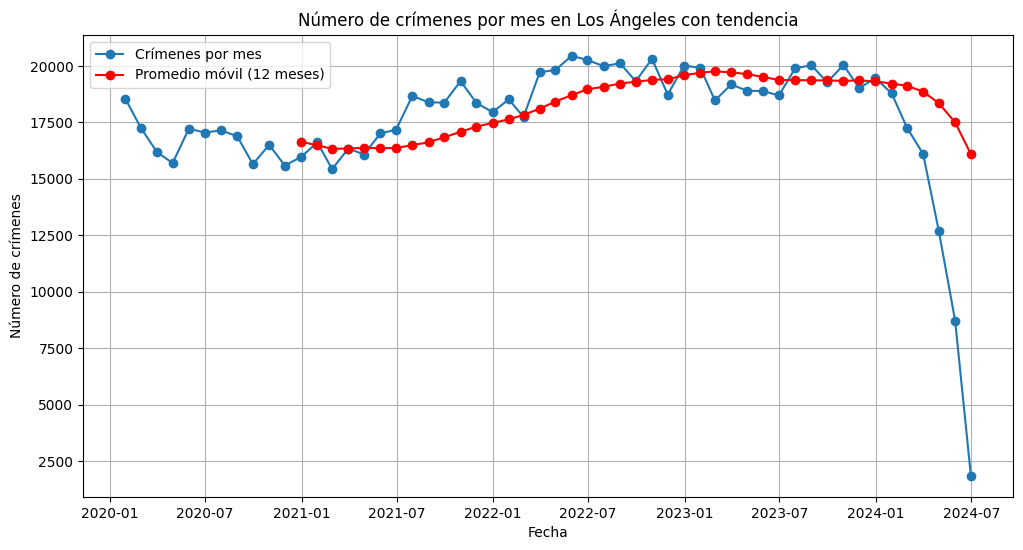

In [14]:
# Convertir la columna 'DATE OCC' a tipo datetime
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Establecer 'DATE OCC' como índice
df1.set_index('DATE OCC', inplace=True)

# Resamplear los datos por mes y contar el número de crímenes en cada mes
crimes_per_month = df1.resample('M').size()

# Crear el gráfico de la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(crimes_per_month, marker='o', linestyle='-')
plt.title('Número de crímenes por mes en Los Ángeles')
plt.xlabel('Fecha')
plt.ylabel('Número de crímenes')
plt.grid(True)
plt.show()

# Mostrar patrones y tendencias utilizando un promedio móvil
crimes_per_month_rolling = crimes_per_month.rolling(window=12).mean()

# Crear el gráfico de la serie de tiempo con la tendencia
plt.figure(figsize=(12, 6))
plt.plot(crimes_per_month, marker='o', linestyle='-', label='Crímenes por mes')
plt.plot(crimes_per_month_rolling, marker='o', linestyle='-', color='red', label='Promedio móvil (12 meses)')
plt.title('Número de crímenes por mes en Los Ángeles con tendencia')
plt.xlabel('Fecha')
plt.ylabel('Número de crímenes')
plt.legend()
plt.grid(True)
plt.show()